In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataset import ImageExpDataset, OriginalDataset
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings('ignore')

In [15]:
dataset = ImageExpDataset(
    fold_file='train_folds.csv',
    image_file_path='../../../mongochu-local/AImongo_img/C1-P1_train/',
    folds=[0,1,2],
    image_height=255,
    image_width=255,
    mean=(0.485,0.456,0.406),
    std=(0.229,0.224,0.225)
)

original = OriginalDataset(
    fold_file='train_folds.csv',
    image_file_path='../../../mongochu-local/AImongo_img/C1-P1_train/',
    folds=[0,1,2],
    image_height=255,
    image_width=255,
    mean=(0.485,0.456,0.406),
    std=(0.229,0.224,0.225)
)
mean=(0.485,0.456,0.406)
std=(0.229,0.224,0.225)

In [16]:
dataset.img_id[4]

'03726'

tensor(2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


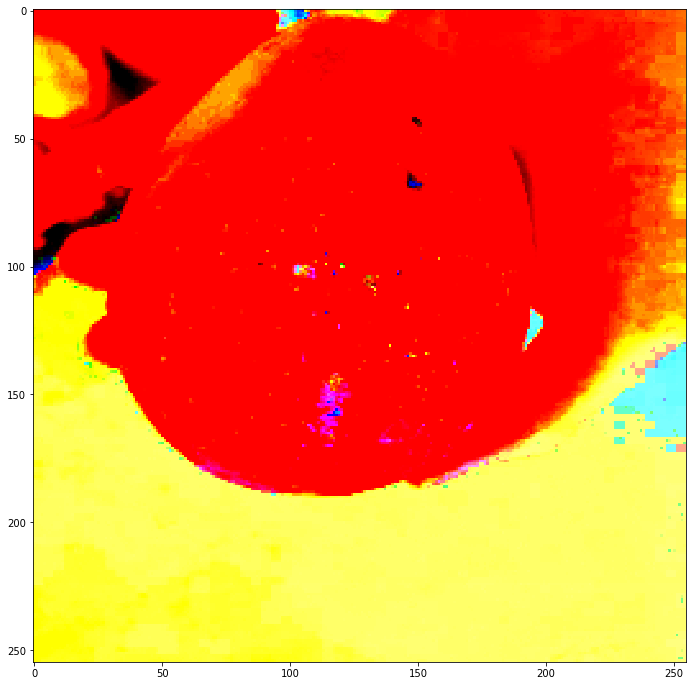

In [17]:
fig, ax = plt.subplots(figsize=(20,12))
i = 2
print(dataset[i]['label'])
ax.imshow(np.transpose(dataset[i]['image'],(2,1,0)))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

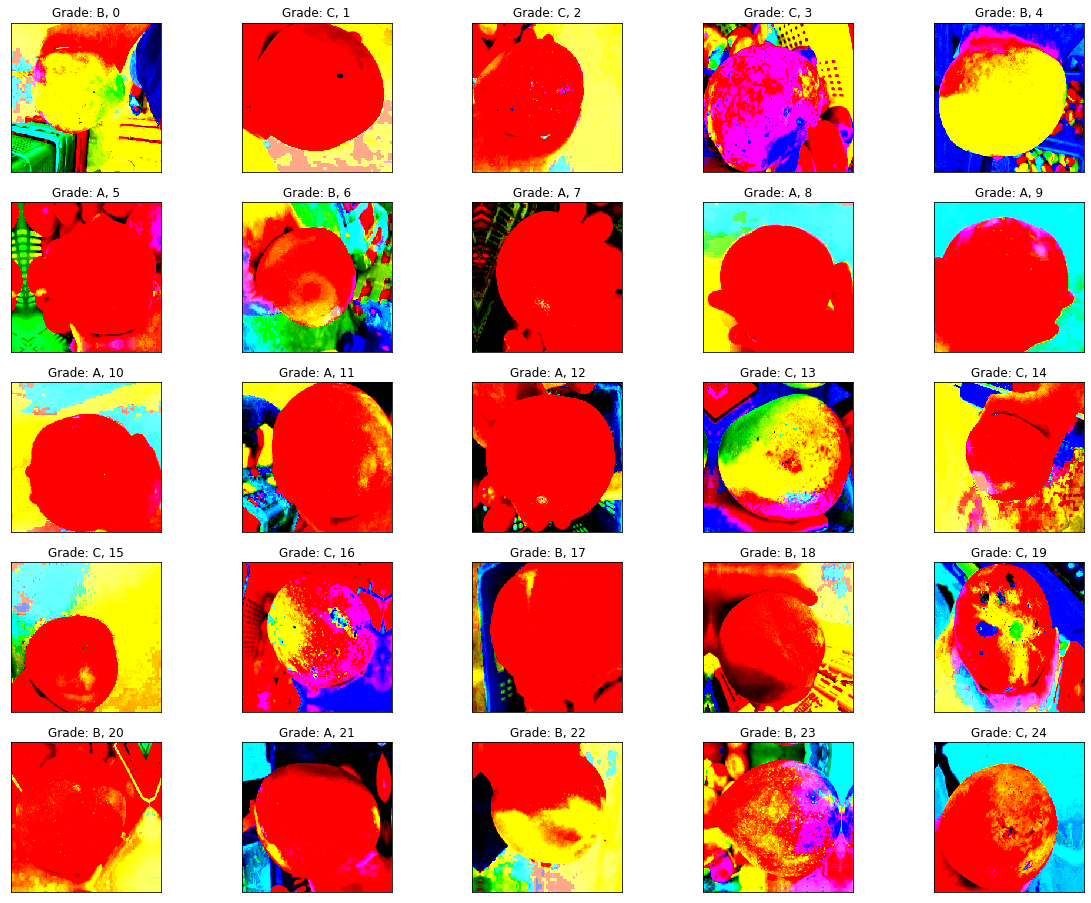

In [18]:
ind = 0
fig, ax = plt.subplots(5,5,figsize=(20,16))
for i, axi in enumerate(ax.flat):
    img = dataset[i+ind]['image']
    label = dataset[i+ind]['label']
    np_img = img.numpy()
    axi.imshow(np.transpose(np_img, (1,2,0)))
    class_map = {0:'A',1:'B',2:'C'}
    axi.set_title(f'Grade: {class_map[label.numpy().item(0)]}, {i+ind}')
    axi.get_xaxis().set_visible(False)
    axi.get_yaxis().set_visible(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

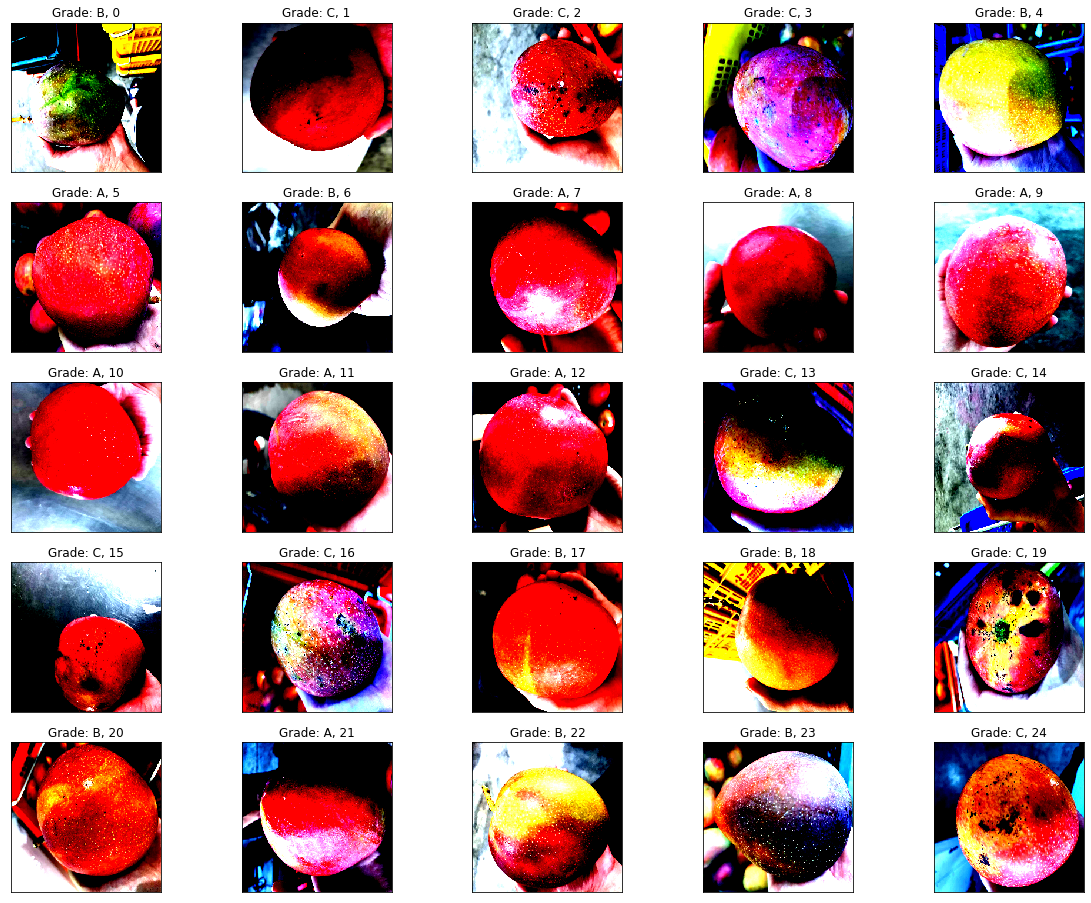

In [19]:
ind = 0
fig, ax = plt.subplots(5,5,figsize=(20,16))
for i, axi in enumerate(ax.flat):
    img = original[i+ind]['image']
    label = original[i+ind]['label']
    np_img = img.numpy()
    axi.imshow(np.transpose(np_img, (1,2,0)))
    class_map = {0:'A',1:'B',2:'C'}
    axi.set_title(f'Grade: {class_map[label.numpy().item(0)]}, {i+ind}')
    axi.get_xaxis().set_visible(False)
    axi.get_yaxis().set_visible(False)
plt.show()

In [21]:
import models
model = models.SE_ResNext101_32x4d_sSE(pretrained=False, n_class=3)
model.to('cpu')

SE_ResNext101_32x4d_sSE(
  (model): SENet(
    (layer0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    )
    (layer1): Sequential(
      (0): SEResNeXtBottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   